CROP YIELD PREDICTION IN INDIA

Predicting yield helps the state to get an estimate of the crop in a certain year to control the price rates.This model focuses on predicting the crop yield in advance by analyzing factors like location, season, and crop type through machine learning techniques on previously collected datasets.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df=pd.read_csv("/content/crop_production.csv")

In [40]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [41]:
df.shape

(246091, 7)

In [42]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [44]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [45]:
df.dropna(inplace=True)

In [46]:
df.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [47]:
# Adding a new column Yield which indicates Production per unit Area.
df['Yield'] = (df['Production'] / df['Area'])

In [48]:
year_yield = df.groupby('Crop_Year').sum()
year_yield

,State_Name,District_Name,Season,Crop,Area,Production,Yield
Crop_Year,,,,,,,
1997,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,ANANTAPURANANTAPURANANTAPURANANTAPURANANTAPURA...,Kharif Kharif Kharif Kharif Kh...,Arhar/TurBajraCastor seedCotton(lint)Dry chill...,2.317150e+08,8.512329e+08,7.700243e+04
1998,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,ANANTAPURANANTAPURANANTAPURANANTAPURANANTAPURA...,Kharif Kharif Kharif Kharif Kh...,Arhar/TurBajraCastor seedCotton(lint)Dry chill...,1.666316e+08,5.825321e+09,2.621950e+05
1999,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,ANANTAPURANANTAPURANANTAPURANANTAPURANANTAPURA...,Kharif Kharif Kharif Kharif Kh...,BajraCastor seedCotton(lint)GroundnutHorse-gra...,1.586125e+08,6.434666e+09,3.136871e+05
2000,Andaman and Nicobar IslandsAndaman and Nicobar...,NICOBARSNICOBARSNICOBARSNICOBARSNICOBARSNICOBA...,Kharif Kharif Kharif Whole Year Wh...,ArecanutOther Kharif pulsesRiceBananaCashewnut...,1.652898e+08,7.449709e+09,4.923061e+05
2001,Andaman and Nicobar IslandsAndaman and Nicobar...,NICOBARSNICOBARSNICOBARSNICOBARSNICOBARSNICOBA...,Kharif Kharif Kharif Whole Year Wh...,ArecanutOther Kharif pulsesRiceCashewnutCoconu...,1.652927e+08,7.465541e+09,5.180357e+05
2002,Andaman and Nicobar IslandsAndaman and Nicobar...,NICOBARSNICOBARSNICOBARSNICOBARSNICOBARSNICOBA...,Kharif Whole Year Whole Year Whole Year Wh...,RiceArecanutBananaBlack pepperCashewnutCoconut...,1.573286e+08,7.696955e+09,5.270905e+05
2003,Andaman and Nicobar IslandsAndaman and Nicobar...,NICOBARSNICOBARSNICOBARSNICOBARSNICOBARSNICOBA...,Kharif Whole Year Whole Year Whole Year Wh...,RiceArecanutBananaBlack pepperCashewnutCoconut...,1.697655e+08,7.917974e+09,5.321510e+05
2004,Andaman and Nicobar IslandsAndaman and Nicobar...,NICOBARSNICOBARSNICOBARSNICOBARSNICOBARSNICOBA...,Kharif Whole Year Whole Year Whole Year Wh...,RiceArecanutBananaBlack pepperCashewnutCoconut...,1.677566e+08,8.189462e+09,5.916140e+05
2005,Andaman and Nicobar IslandsAndaman and Nicobar...,NICOBARSNICOBARSNICOBARSNICOBARSNICOBARSNICOBA...,Kharif Whole Year Whole Year Whole Year Wh...,RiceBananaBlack pepperCashewnutCoconut Turmeri...,1.629203e+08,8.043757e+09,3.538034e+05


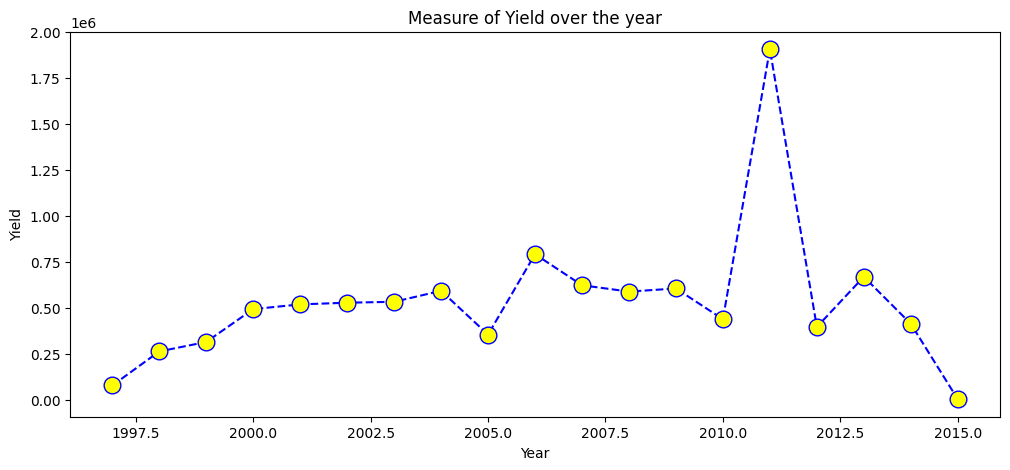

In [49]:
plt.figure(figsize = (12,5))
plt.plot(year_yield.index, year_yield['Yield'],color='blue', linestyle='dashed', marker='o',
        markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Measure of Yield over the year')
plt.show()

In [50]:
df_state = df.groupby('State_Name').sum()
df_state.sort_values(by = 'Yield', ascending = False)
df_state

,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
State_Name,,,,,,,
Andaman and Nicobar Islands,NICOBARSNICOBARSNICOBARSNICOBARSNICOBARSNICOBA...,403014,Kharif Kharif Kharif Whole Year Wh...,ArecanutOther Kharif pulsesRiceBananaCashewnut...,3.370834e+05,7.182232e+08,6.905418e+04
Andhra Pradesh,ANANTAPURANANTAPURANANTAPURANANTAPURANANTAPURA...,19180467,Kharif Kharif Kharif Kharif Kh...,Arhar/TurBajraCastor seedCotton(lint)Dry chill...,1.315073e+08,1.732459e+10,1.865720e+06
Arunachal Pradesh,ANJAWANJAWANJAWANJAWANJAWANJAWANJAWANJAWANJAWA...,5103954,Kharif Kharif Kharif Rabi Wh...,MaizeRiceSmall milletsWheatDry chilliesDry gin...,4.364340e+06,6.823913e+06,9.281943e+03
Assam,BAKSABAKSABAKSABAKSABAKSABAKSABAKSABAKSABAKSAB...,29337168,Autumn Kharif Kharif Kharif Kh...,RiceArhar/TurCastor seedCotton(lint)JuteMaizeM...,7.037875e+07,2.111752e+09,2.173275e+06
Bihar,ARARIAARARIAARARIAARARIAARARIAARARIAARARIAARAR...,37843015,Autumn Kharif Kharif Kharif Kh...,RiceArhar/TurDry gingerGroundnutJuteMaizeMesta...,1.282695e+08,3.664836e+08,6.624423e+04
Chandigarh,CHANDIGARHCHANDIGARHCHANDIGARHCHANDIGARHCHANDI...,178252,Kharif Kharif Kharif Kharif Kh...,Arhar/TurMaizeMoong(Green Gram)RiceUradGramMas...,1.250200e+04,6.395650e+04,6.966819e+02
Chhattisgarh,BALODBALODBALODBALODBALODBALODBALODBALODBALODB...,20815823,Kharif Kharif Kharif Kharif Kh...,Arhar/TurHorse-gramJowarMaizeMestaMoong(Green ...,8.293135e+07,1.009519e+08,2.259795e+04
Dadra and Nagar Haveli,DADRA AND NAGAR HAVELIDADRA AND NAGAR HAVELIDA...,527363,Kharif Kharif Kharif Kharif Kh...,Arhar/TurCoconut GroundnutJowarMaizeNiger seed...,3.965150e+05,1.847871e+06,1.973514e+03
Goa,NORTH GOANORTH GOANORTH GOANORTH GOANORTH GOAN...,415887,Kharif Kharif Rabi Rabi Wh...,GroundnutOther Kharif pulsesGroundnutOther Ra...,1.205678e+06,5.057558e+08,4.122624e+04


In [51]:
category_columns = df.select_dtypes(include = ['object']).columns
category_columns

Index(['State_Name', 'District_Name', 'Season', 'Crop'], dtype='object')

In [52]:
df = pd.get_dummies(df, columns = category_columns, drop_first=True)

In [53]:
df.shape

(242361, 809)

In [54]:
df.head()

,Crop_Year,Area,Production,Yield,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,2000,1254.0,2000.0,1.594896,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2000,2.0,1.0,0.500000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2000,102.0,321.0,3.147059,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2000,176.0,641.0,3.642045,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2000,720.0,165.0,0.229167,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
from sklearn.model_selection import train_test_split

x = df.drop(["Production","Yield"], axis=1)
y = df["Production"]

# Splitting data set - 25% test dataset and 75%

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=5)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (181770, 807)
x_test : (60591, 807)
y_train : (181770,)
y_test : (60591,)


In [56]:
print(x_train)
print(y_train)

        Crop_Year    Area  State_Name_Andhra Pradesh  \
201072       2013    16.0                      False   
191897       1998  5400.0                      False   
43814        2000  2968.0                      False   
32815        2013   211.0                      False   
62249        2006  1700.0                      False   
...           ...     ...                        ...   
236131       2000   207.0                      False   
127145       2007    39.0                      False   
20536        2005    43.0                      False   
18709        2011  2489.0                      False   
35767        1999    67.0                      False   

        State_Name_Arunachal Pradesh  State_Name_Assam  State_Name_Bihar  \
201072                         False             False             False   
191897                         False             False             False   
43814                          False             False              True   
32815                  

Linear Regression with skewed data¶

In [57]:
# Training the Simple Linear Regression model .

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [58]:
# Predicting the test Results

lr_predict = model.predict(x_test)
lr_predict

array([ -151041.00068004,   484635.06347784, -1265373.63900684, ...,
         142583.14560702, -1739172.5813167 ,   284797.52855309])

In [59]:
model.score(x_test,y_test)

0.17832910278085545

In [60]:
from sklearn.metrics import r2_score
r = r2_score(y_test,lr_predict)
print("R2 score : ",r)

R2 score :  0.17832910278085545


Text(0.5, 1.0, 'Linear Regression')

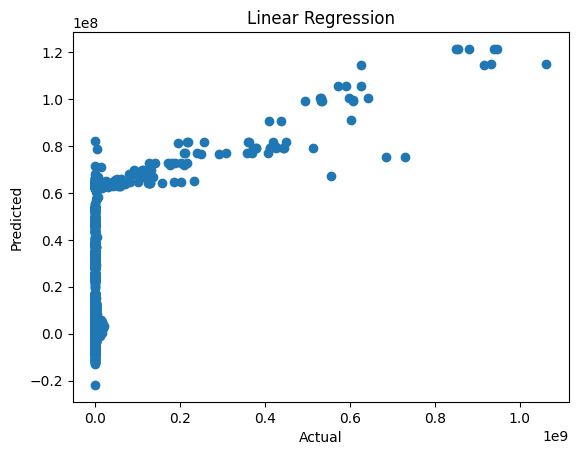

In [61]:
plt.scatter(y_test,lr_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

In [62]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred_train = lr.predict(x_train)
print("Training Accuracy : ",r2_score(y_train,y_pred_train))

y_pred_test = lr.predict(x_test)
print("Test Accuracy : ",r2_score(y_test,y_pred_test))

Training Accuracy :  0.1636899136639982
Test Accuracy :  0.17832910278085545


Random forest Regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 11)
model.fit(x_train,y_train)
rf_predict = model.predict(x_test)
rf_predict

array([ 4533.55454545,   670.20909091,  2394.27272727, ...,
         257.54545455, 13055.54545455,   109.09090909])

In [64]:
model.score(x_test,y_test)

0.9720809047329542

In [65]:
# Calculating R2 score

from sklearn.metrics import r2_score
r1 = r2_score(y_test,rf_predict)
print("R2 score : ",r1)

R2 score :  0.9720809047329542


Decision Tree

In [67]:
# Training model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 5)
regressor.fit(x_train,y_train)

# Predicting results
decisiontree_predict = regressor.predict(x_test)
decisiontree_predict

array([ 4510.,   670.,  2377., ...,   196., 12320.,   100.])

In [68]:
regressor.score(x_test,y_test)

0.9492534326708376

In [69]:
# Calculating R2 score :

from sklearn.metrics import r2_score
r2 = r2_score(y_test,decisiontree_predict)
print("R2 score : ",r2)

R2 score :  0.9492534326708376


Random forest Regressor is Performing well
